In [1]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
ssh_tunnel = SSHTunnelForwarder(
    ssh_address_or_host='',
    ssh_username="tunel_bazi",
    ssh_password="",
    remote_bind_address=('localhost', 5432))
ssh_tunnel.start()
engine = create_engine(f'postgresql://baza@localhost:{ssh_tunnel.local_bind_port}/pollution',
                       connect_args={'options': '-csearch_path=pollution'})

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
def generate_plot(pollutant, plot):
    sqlSel="select round(temperature) as temp, type, avg(data) as aver, count(data) as cnt \
    from table_copy \
    where  type='"+pollutant+"' \
    group by round(temperature), type \
    having count(data)>100;"
    df=pd.read_sql(sqlSel, engine)
    pd.set_option('display.max_rows', 100)
    df.plot(x="temp", y="aver", kind=plot)
    plt.suptitle('Зависност на '+pollutant+' од температура', fontsize=20)
    plt.xlabel('Температура', fontsize=18)
    plt.ylabel('Вредност', fontsize=16)
    plt.show();

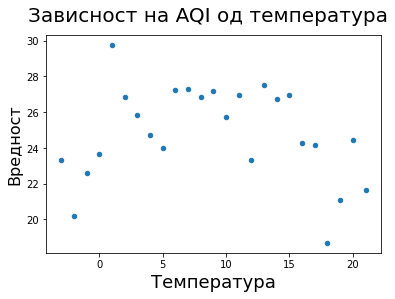

In [32]:
generate_plot('AQI', 'scatter')

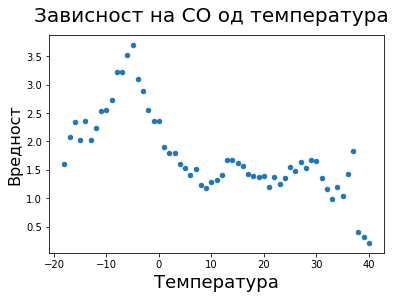

In [33]:
generate_plot('CO', 'scatter')

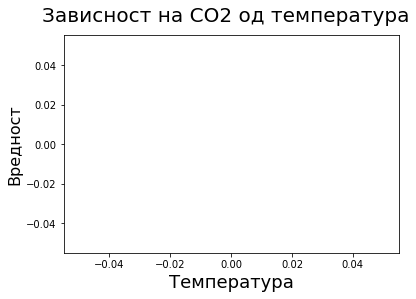

In [34]:
generate_plot('CO2', 'scatter')

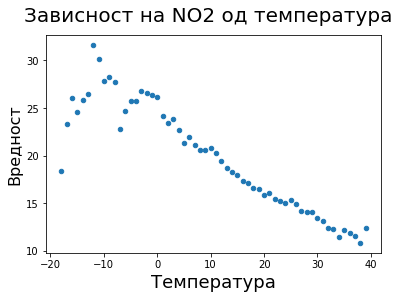

In [35]:
generate_plot('NO2', 'scatter')

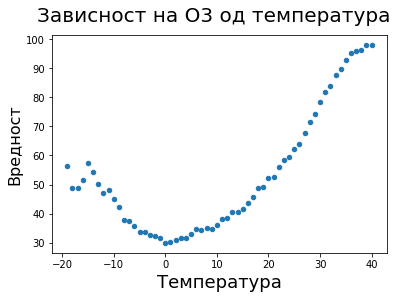

In [36]:
generate_plot('O3', 'scatter')

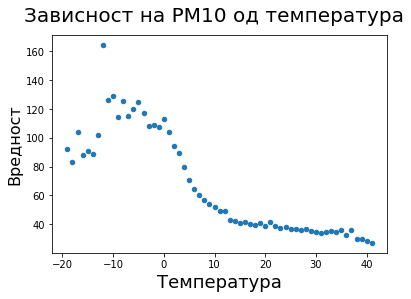

In [37]:
generate_plot('PM10', 'scatter')

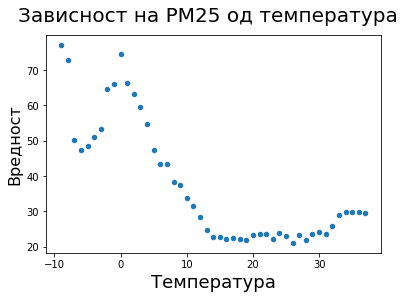

In [38]:
generate_plot('PM25', 'scatter')

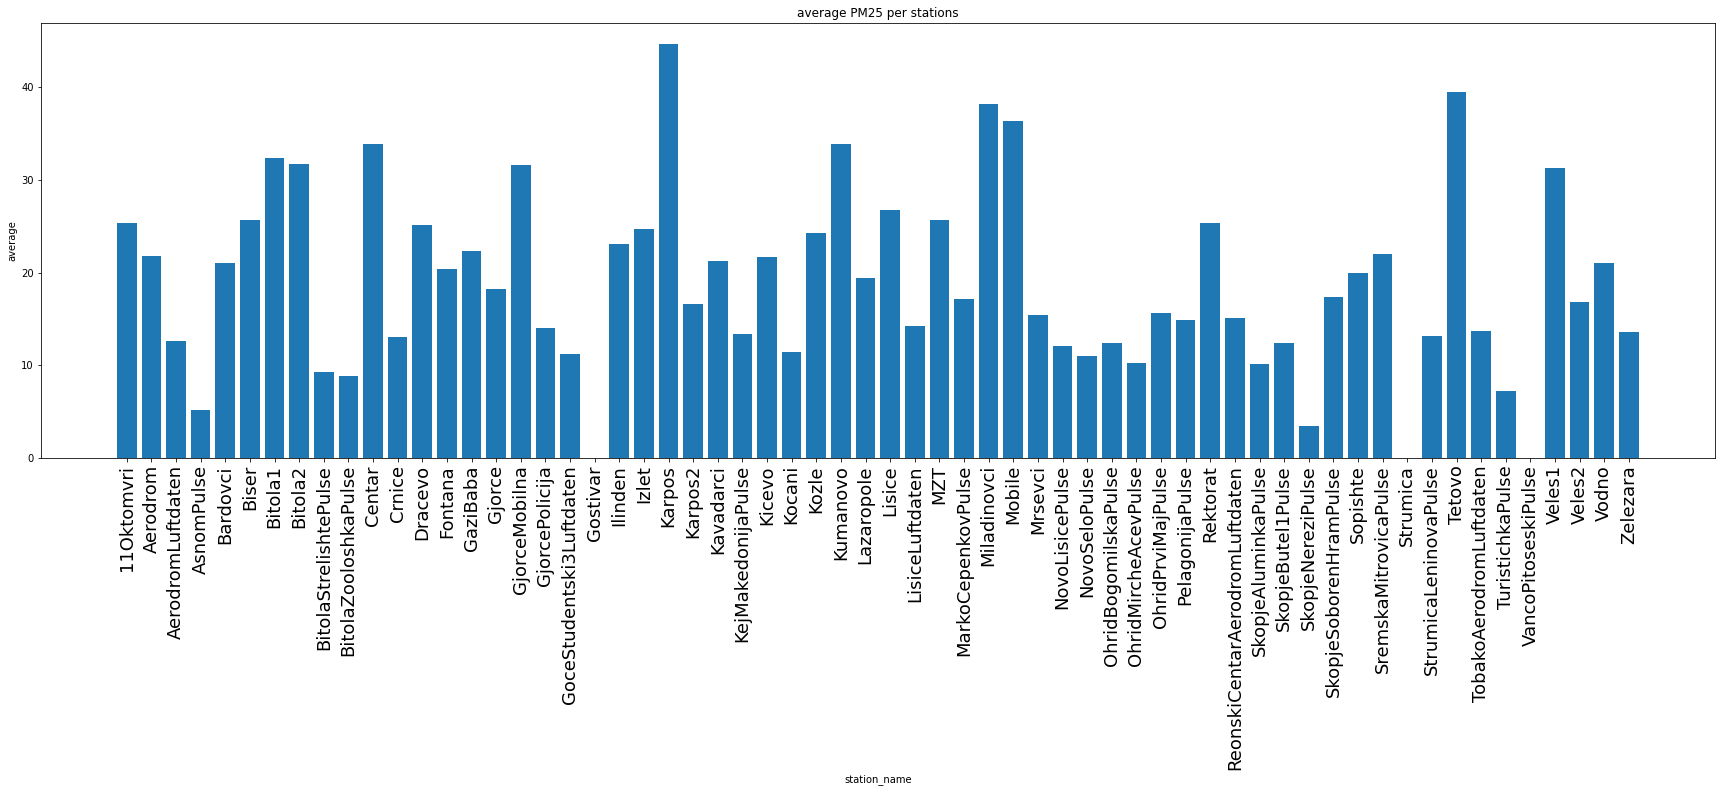

In [98]:
sqlSel="select stationname as name, avg(data) as aver from table_copy where type='PM25' group by stationname"
df=pd.read_sql(sqlSel, engine)

plt.bar(df.name, df.aver)
plt.xlabel("station_name")
plt.xticks(rotation = 90)
plt.xticks(fontsize=18)
plt.ylabel("average")
plt.title("average PM25 per stations")
plt.rcParams["figure.figsize"]=30,8
plt.show();

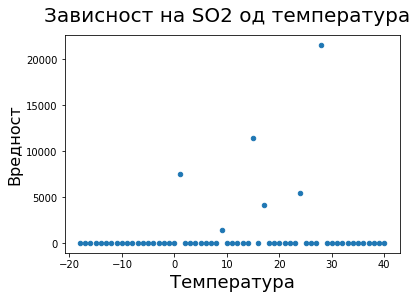

In [39]:
generate_plot('SO2', 'scatter')

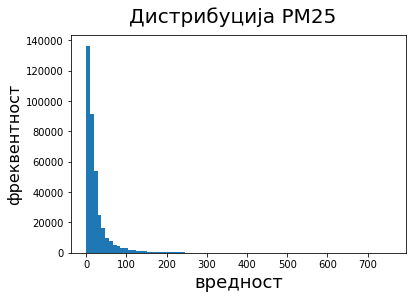

In [4]:
%matplotlib inline
sqlSel="select data from table_copy where type = 'PM25' and data < 801"
df=pd.read_sql(sqlSel, engine)
plt.hist(df, bins=80)  
plt.suptitle('Дистрибуција PM25', fontsize=20)
plt.xlabel('вредност', fontsize=18)
plt.ylabel('фреквентност', fontsize=16)
plt.show();

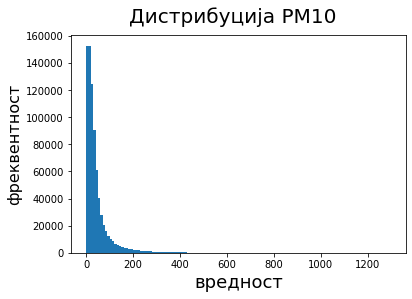

In [5]:
sqlSel="select data from table_copy where type = 'PM10' and data < 1301"
df=pd.read_sql(sqlSel, engine)
plt.hist(df, bins=130) 
plt.suptitle('Дистрибуција PM10', fontsize=20)
plt.xlabel('вредност', fontsize=18)
plt.ylabel('фреквентност', fontsize=16)
plt.show(); --100 na desnoo samo del sose outlier za da vidime

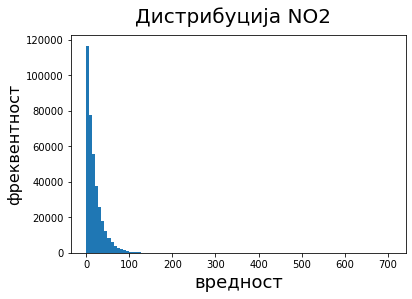

In [6]:
sqlSel="select data from table_copy where type = 'NO2'"
df=pd.read_sql(sqlSel, engine)
plt.hist(df, bins=100) 
plt.suptitle('Дистрибуција NO2', fontsize=20)
plt.xlabel('вредност', fontsize=18)
plt.ylabel('фреквентност', fontsize=16)
plt.show();

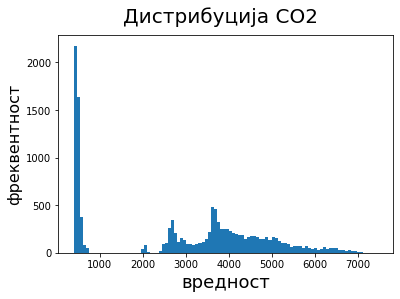

2022-01-21 02:39:00,905| ERROR   | Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [7]:
sqlSel="select data from table_copy where type = 'CO2'"
df=pd.read_sql(sqlSel, engine)
plt.hist(df, bins=100)  
plt.suptitle('Дистрибуција CO2', fontsize=20)
plt.xlabel('вредност', fontsize=18)
plt.ylabel('фреквентност', fontsize=16)
plt.show();

        NORMALIZATION

In [ ]:
sqlSel="select * from table_copy"
df=pd.read_sql(sqlSel, engine)
df.plot(kind = 'bar')
plt.show(); -- normalizacija se osven outlier 

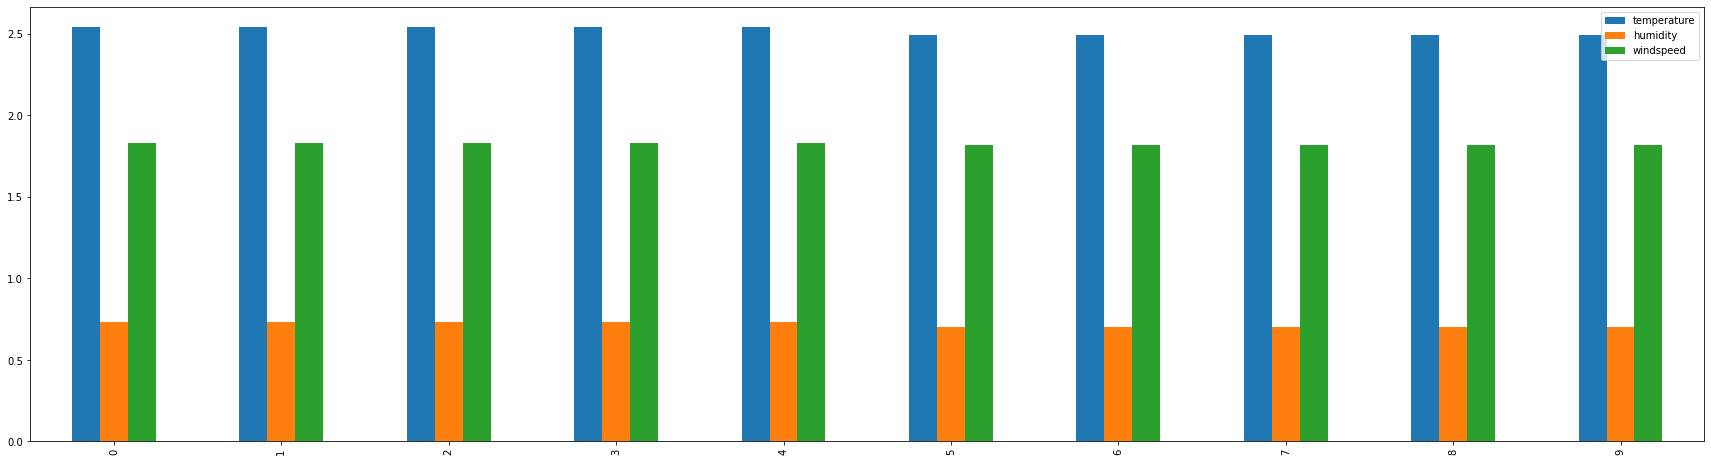

In [105]:
sqlSel="select temperature, humidity, windspeed from table_copy where stationname = 'Karpos' \
and data is not null and temperature is not null \
and humidity is not null and windspeed is not null limit 10"
df=pd.read_sql(sqlSel, engine)
df.plot(kind = 'bar')
plt.show();

<AxesSubplot:>

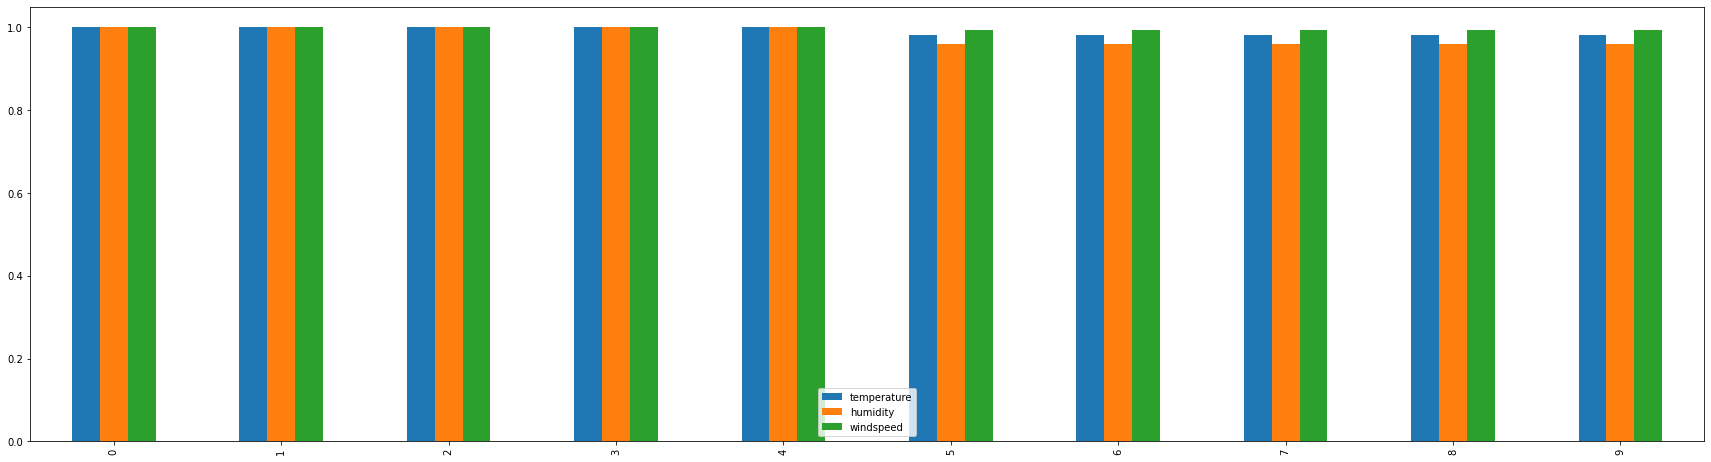

In [106]:
df_max_scaled = df.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
df_max_scaled.plot(kind = 'bar')

<AxesSubplot:>

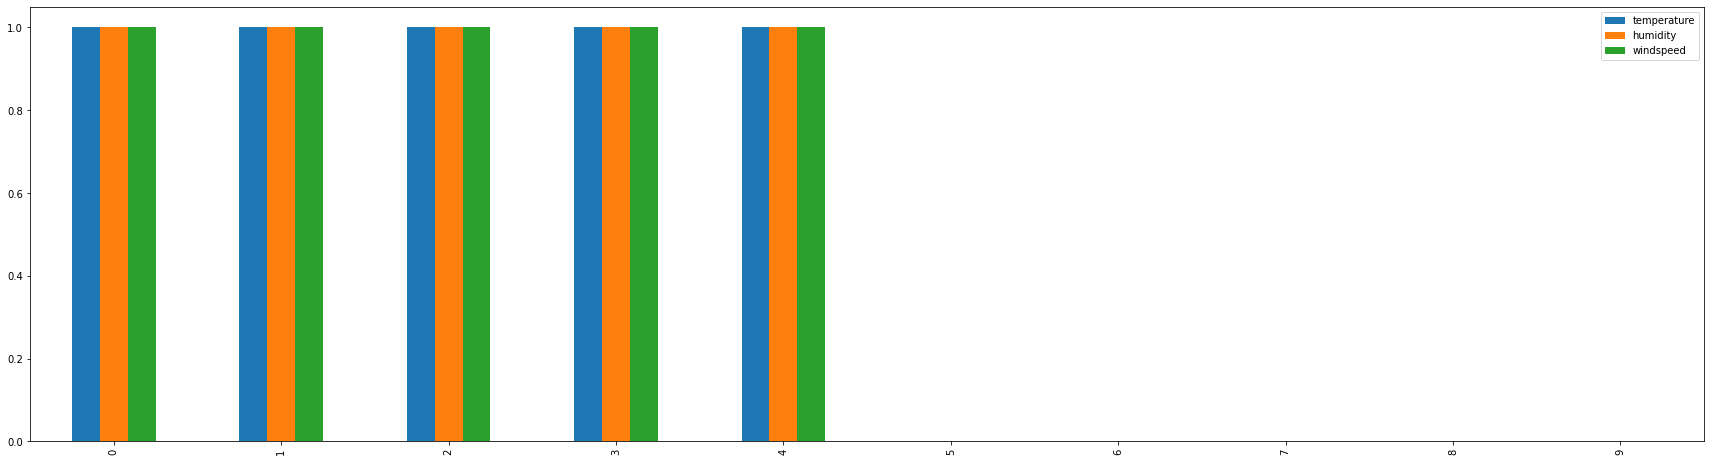

In [107]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
df_min_max_scaled.plot(kind = 'bar')

<AxesSubplot:>

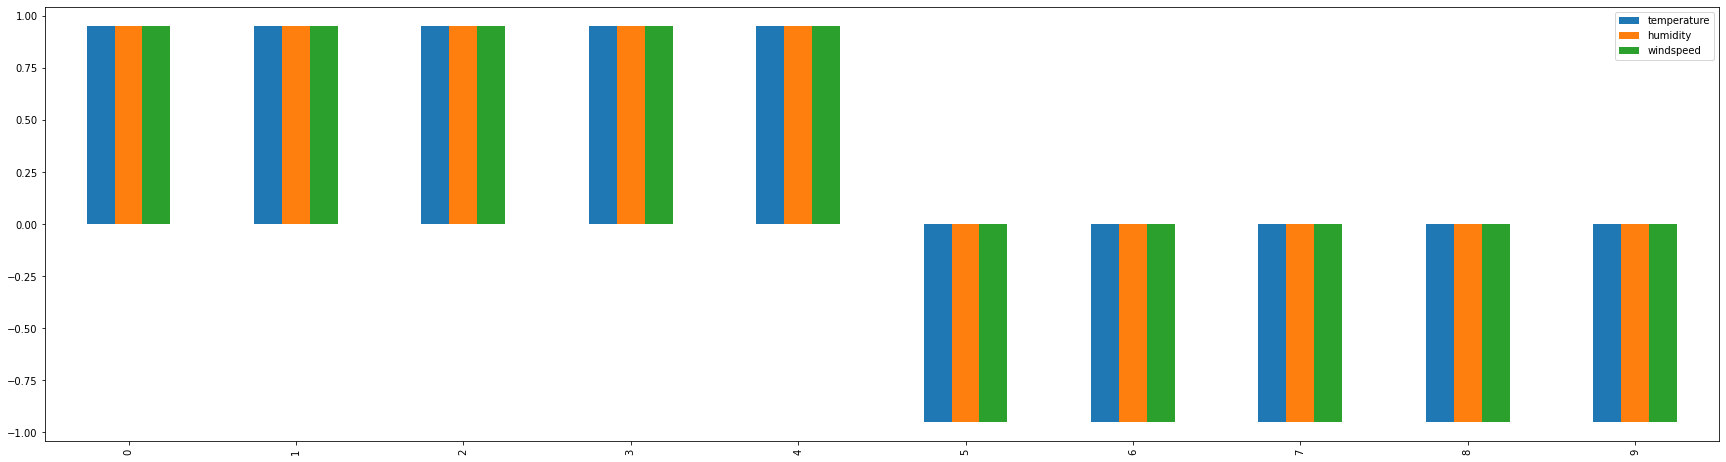

2022-01-20 10:20:46,026| ERROR   | Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [110]:
df_scaled = df.copy()
for column in df_scaled.columns:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].mean()) / df_scaled[column].std()    
df_scaled.plot(kind='bar')

novo

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

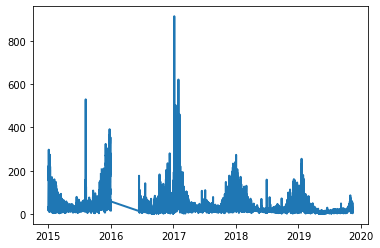

In [16]:
sqlSel="select datetime as time, avg(data) as pm25 from table_copy where type='PM25' group by datetime"
df=pd.read_sql(sqlSel, engine)
plt.plot( 'time', 'pm25', data=df, linewidth=2)
plt.show()

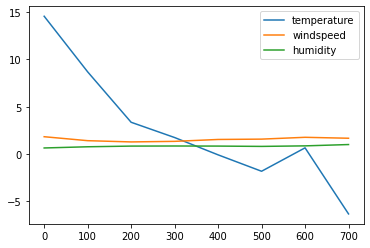

In [37]:
sqlSel="select round(data::integer, -2) as pm25, avg(temperature) as temp_ from table_copy where type='PM25' and data<801 group by round(data::integer, -2) "
df=pd.read_sql(sqlSel, engine)
sqlSel1="select round(data::integer, -2) as pm25, avg(windspeed) as wind from table_copy where type='PM25' and data<801 group by round(data::integer, -2)"
df1=pd.read_sql(sqlSel1, engine)
sqlSel2="select round(data::integer, -2) as pm25, avg(humidity) as humidity from table_copy where type='PM25' and data<801 group by round(data::integer, -2)"
df2=pd.read_sql(sqlSel2, engine)
sqlSel3="select round(data::integer, -2) as pm25, avg(humidity) as humidity from table_copy where type='PM25' and data<801 group by round(data::integer, -2)"
df3=pd.read_sql(sqlSel3, engine)
plt.plot( 'pm25', 'temp_', data=df, label='temperature')
plt.plot( 'pm25', 'wind', data=df1, label='windspeed')
plt.plot( 'pm25', 'humidity', data=df2, label='humidity')
plt.legend()
plt.show()

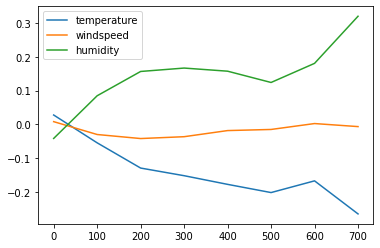

In [98]:
sqlSel="select round(data::integer, -2) as pm25, avg(temperature) as temp_ from normalized_table where type='PM25' and data<801 group by round(data::integer, -2) "
df=pd.read_sql(sqlSel, engine)
sqlSel1="select round(data::integer, -2) as pm25, avg(windspeed) as wind from normalized_table where type='PM25' and data<801 group by round(data::integer, -2)"
df1=pd.read_sql(sqlSel1, engine)
sqlSel2="select round(data::integer, -2) as pm25, avg(humidity) as humidity from normalized_table where type='PM25' and data<801 group by round(data::integer, -2)"
df2=pd.read_sql(sqlSel2, engine)
sqlSel3="select round(data::integer, -2) as pm25, avg(humidity) as humidity from normalized_table where type='PM25' and data<801 group by round(data::integer, -2)"
df3=pd.read_sql(sqlSel3, engine)
plt.plot( 'pm25', 'temp_', data=df, label='temperature')
plt.plot( 'pm25', 'wind', data=df1, label='windspeed')
plt.plot( 'pm25', 'humidity', data=df2, label='humidity')
plt.legend()
plt.show()

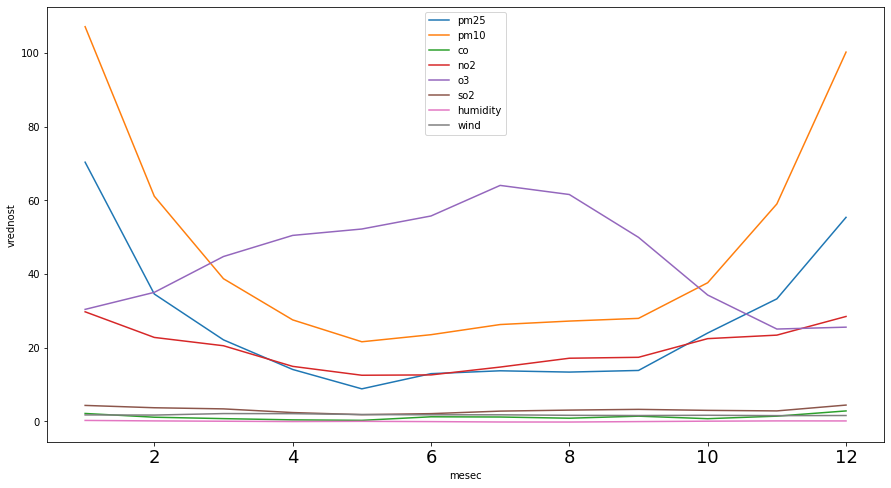

In [86]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel1="select extract(month from datetime) as month, avg(data) as pm25 from table_copy where type='PM25' group by extract(month from datetime)"
df1=pd.read_sql(sqlSel1, engine)
plt.plot('month', 'pm25', data=df1, label='pm25')
sqlSel2="select extract(month from datetime) as month, avg(data) as pm10 from table_copy where type='PM10' group by extract(month from datetime)"
df2=pd.read_sql(sqlSel2, engine)
plt.plot('month', 'pm10', data=df2, label='pm10')
#sqlSel3="select extract(month from datetime) as month, avg(data) as aqi from table_copy where type='AQI' group by extract(month from datetime)"
#df3=pd.read_sql(sqlSel3, engine)
#plt.plot('month', 'aqi', data=df3, label='aqi')
sqlSel4="select extract(month from datetime) as month, avg(data) as co from table_copy where type='CO' group by extract(month from datetime)"
df4=pd.read_sql(sqlSel4, engine)
plt.plot('month', 'co', data=df4, label='co')
#sqlSel5="select extract(month from datetime) as month, avg(data) as co2 from table_copy where type='CO2' group by extract(month from datetime)"
#df5=pd.read_sql(sqlSel5, engine)
#plt.plot('month', 'co2', data=df5, label='co2')
sqlSel6="select extract(month from datetime) as month, avg(data) as no2 from table_copy where type='NO2' group by extract(month from datetime)"
df6=pd.read_sql(sqlSel6, engine)
plt.plot('month', 'no2', data=df6, label='no2')
sqlSel7="select extract(month from datetime) as month, avg(data) as o3 from table_copy where type='O3' group by extract(month from datetime)"
df7=pd.read_sql(sqlSel7, engine)
plt.plot('month', 'o3', data=df7, label='o3')
sqlSel8="select extract(month from datetime) as month, avg(data) as so2 from table_copy where type='SO2' group by extract(month from datetime)"
df8=pd.read_sql(sqlSel8, engine)
plt.plot('month', 'so2', data=df8, label='so2')
sqlSel9="select extract(month from datetime) as month, avg(temperature) as temp from table_copy group by extract(month from datetime)"
df9=pd.read_sql(sqlSel9, engine)
#plt.plot('month', 'temp', data=df9, label='temp')
#sqlSel10="select extract(month from datetime) as month, avg(humidity) as humidity from table_copy group by extract(month from datetime)"
#df10=pd.read_sql(sqlSel10, engine)
plt.plot('month', 'humidity', data=df10, label='humidity')
sqlSel11="select extract(month from datetime) as month, avg(windspeed) as wind from table_copy group by extract(month from datetime)"
df11=pd.read_sql(sqlSel11, engine)
plt.plot('month', 'wind', data=df11, label='wind')
plt.xlabel("mesec")
plt.xticks(fontsize=18)
plt.ylabel("vrednost")
plt.legend()
plt.show()

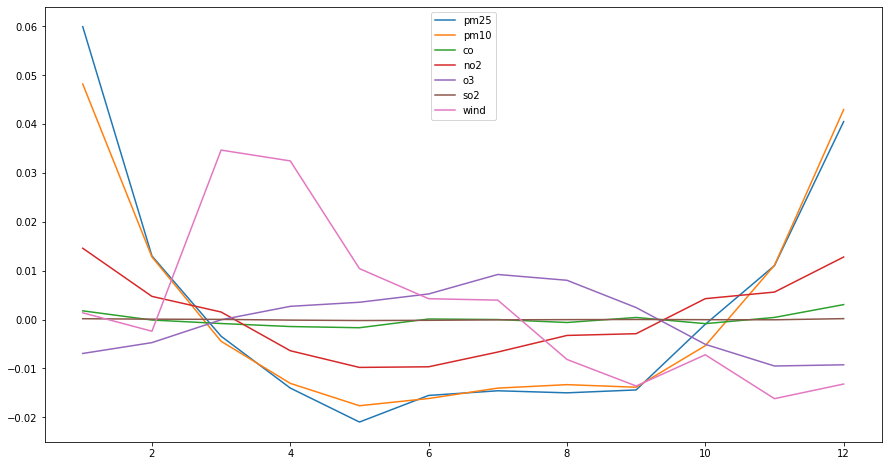

In [55]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel1="select extract(month from datetime) as month, avg(data) as pm25 from normalized_table where type='PM25' group by extract(month from datetime)"
df1=pd.read_sql(sqlSel1, engine)
plt.plot('month', 'pm25', data=df1, label='pm25')
sqlSel2="select extract(month from datetime) as month, avg(data) as pm10 from normalized_table where type='PM10' group by extract(month from datetime)"
df2=pd.read_sql(sqlSel2, engine)
plt.plot('month', 'pm10', data=df2, label='pm10')
#sqlSel3="select extract(month from datetime) as month, avg(data) as aqi from normalized_table where type='AQI' group by extract(month from datetime)"
#df3=pd.read_sql(sqlSel3, engine)
#plt.plot('month', 'aqi', data=df3, label='aqi')
sqlSel4="select extract(month from datetime) as month, avg(data) as co from normalized_table where type='CO' group by extract(month from datetime)"
df4=pd.read_sql(sqlSel4, engine)
plt.plot('month', 'co', data=df4, label='co')
#sqlSel5="select extract(month from datetime) as month, avg(data) as co2 from normalized_table where type='CO2' group by extract(month from datetime)"
#df5=pd.read_sql(sqlSel5, engine)
#plt.plot('month', 'co2', data=df5, label='co2')
sqlSel6="select extract(month from datetime) as month, avg(data) as no2 from normalized_table where type='NO2' group by extract(month from datetime)"
df6=pd.read_sql(sqlSel6, engine)
plt.plot('month', 'no2', data=df6, label='no2')
sqlSel7="select extract(month from datetime) as month, avg(data) as o3 from normalized_table where type='O3' group by extract(month from datetime)"
df7=pd.read_sql(sqlSel7, engine)
plt.plot('month', 'o3', data=df7, label='o3')
sqlSel8="select extract(month from datetime) as month, avg(data) as so2 from normalized_table where type='SO2' group by extract(month from datetime)"
df8=pd.read_sql(sqlSel8, engine)
plt.plot('month', 'so2', data=df8, label='so2')
#sqlSel9="select extract(month from datetime) as month, avg(temperature) as temp from normalized_table group by extract(month from datetime)"
#df9=pd.read_sql(sqlSel9, engine)
#plt.plot('month', 'temp', data=df9, label='temp')
sqlSel10="select extract(month from datetime) as month, avg(humidity) as humidity from normalized_table group by extract(month from datetime)"
df10=pd.read_sql(sqlSel10, engine)
plt.plot('month', 'humidity', data=df10, label='humidity')
#sqlSel11="select extract(month from datetime) as month, avg(windspeed) as wind from normalized_table group by extract(month from datetime)"
#df11=pd.read_sql(sqlSel11, engine)
#plt.plot('month', 'wind', data=df11, label='wind')
plt.legend()
plt.show()

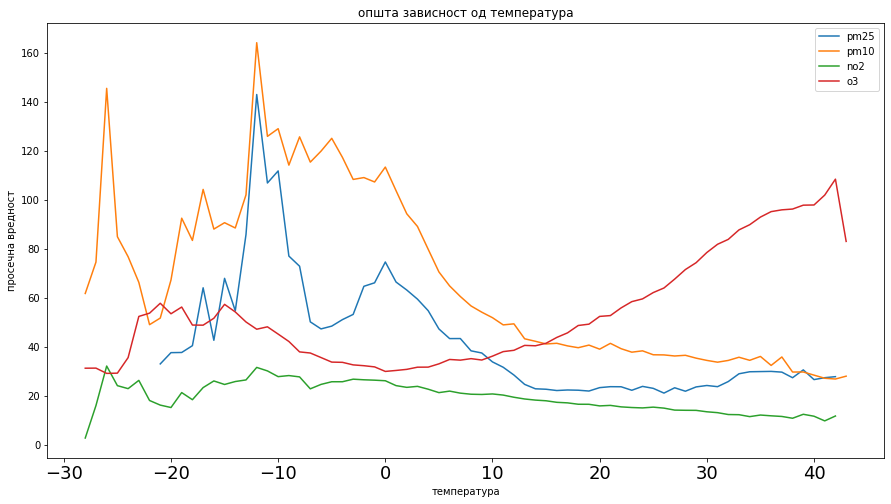

In [99]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel1="select round(temperature) as temp, avg(data) as pm25 from table_copy where type='PM25' group by round(temperature)"
df1=pd.read_sql(sqlSel1, engine)
plt.plot('temp', 'pm25', data=df1, label='pm25')
sqlSel2="select round(temperature) as temp, avg(data) as pm10 from table_copy where type='PM10' group by round(temperature)"
df2=pd.read_sql(sqlSel2, engine)
plt.plot('temp', 'pm10', data=df2, label='pm10')
sqlSel3="select round(temperature) as temp, avg(data) as no2 from table_copy where type='NO2' group by round(temperature)"
df3=pd.read_sql(sqlSel3, engine)
plt.plot('temp', 'no2', data=df3, label='no2')
sqlSel4="select round(temperature) as temp, avg(data) as o3 from table_copy where type='O3' group by round(temperature)"
df4=pd.read_sql(sqlSel4, engine)
plt.plot('temp', 'o3', data=df4, label='o3')
plt.xlabel("температура")
plt.xticks(fontsize=18)
plt.ylabel("просечна вредност")
plt.title("општа зависност од температура")
plt.legend()
plt.show()

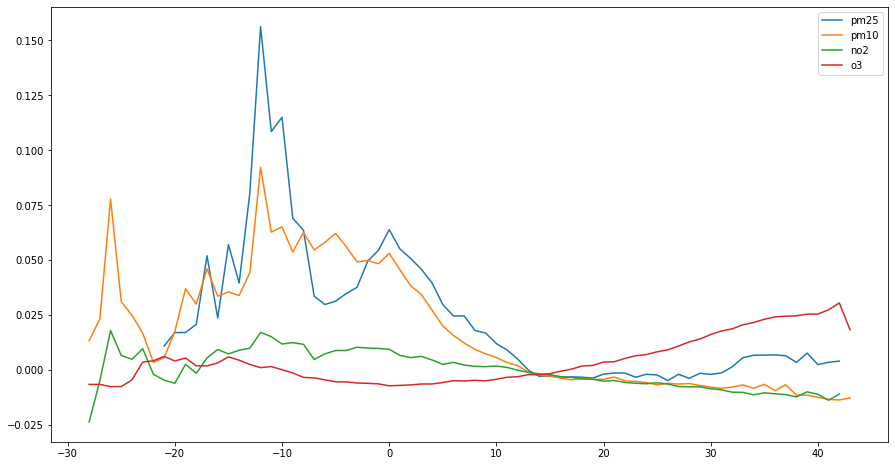

2022-01-26 01:06:58,489| ERROR   | Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [101]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel1="select round(temperature) as temp, avg(data) as pm25 from normalized_table where type='PM25' group by round(temperature)"
df1=pd.read_sql(sqlSel1, engine)
plt.plot('temp', 'pm25', data=df1, label='pm25')
sqlSel2="select round(temperature) as temp, avg(data) as pm10 from normalized_table where type='PM10' group by round(temperature)"
df2=pd.read_sql(sqlSel2, engine)
plt.plot('temp', 'pm10', data=df2, label='pm10')
sqlSel3="select round(temperature) as temp, avg(data) as no2 from normalized_table where type='NO2' group by round(temperature)"
df3=pd.read_sql(sqlSel3, engine)
plt.plot('temp', 'no2', data=df3, label='no2')
sqlSel4="select round(temperature) as temp, avg(data) as o3 from normalized_table where type='O3' group by round(temperature)"
df4=pd.read_sql(sqlSel4, engine)
plt.plot('temp', 'o3', data=df4, label='o3')

plt.legend()
plt.show()

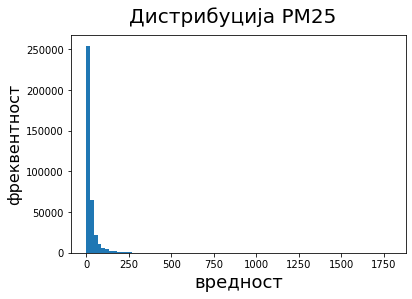

In [70]:
sqlSel="select data from table_copy where type = 'PM25'"
df=pd.read_sql(sqlSel, engine)
plt.hist(df, bins=80)  
plt.suptitle('Дистрибуција PM25', fontsize=20)
plt.xlabel('вредност', fontsize=18)
plt.ylabel('фреквентност', fontsize=16)
plt.show();

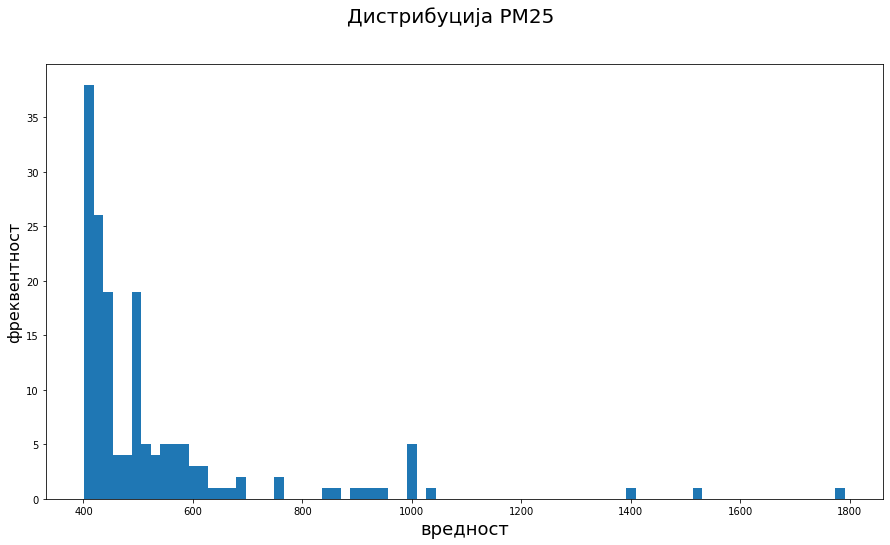

In [73]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select data from table_copy where type = 'PM25' and data>400"
df=pd.read_sql(sqlSel, engine)
plt.hist(df, bins=80)  
plt.suptitle('Дистрибуција PM25', fontsize=20)
plt.xlabel('вредност', fontsize=18)
plt.ylabel('фреквентност', fontsize=16)
plt.show(); # proveri 100kite

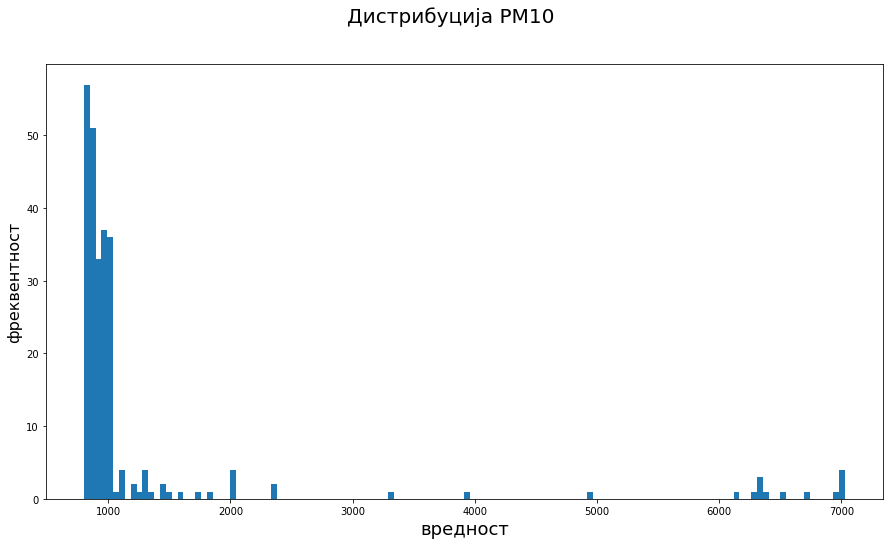

In [80]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select data from table_copy where type = 'PM10' and data > 800"
df=pd.read_sql(sqlSel, engine)
plt.hist(df, bins=130) 
plt.suptitle('Дистрибуција PM10', fontsize=20)
plt.xlabel('вредност', fontsize=18)
plt.ylabel('фреквентност', fontsize=16)
plt.show(); # proveri 2000kite

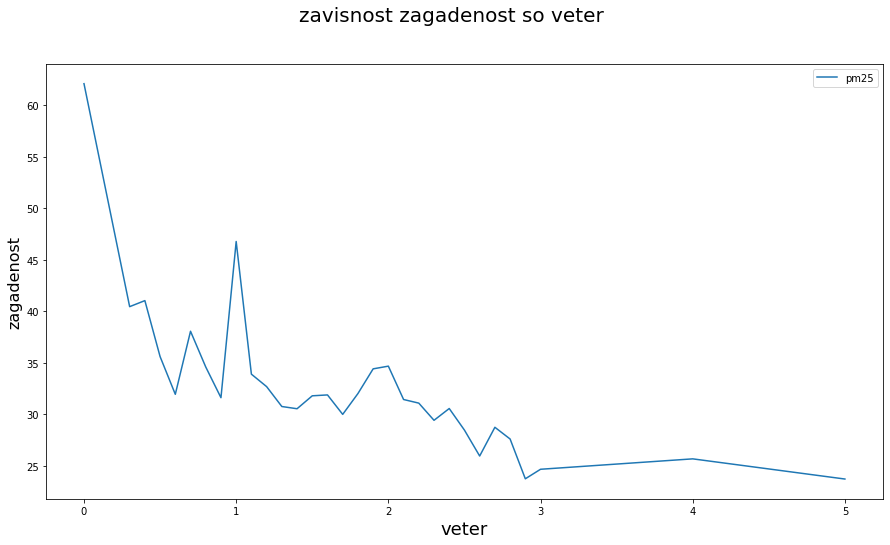

In [4]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select round(windspeed::numeric, 1) as windspeed, avg(data) as pm25 from table_copy where type='PM25'\
group by  round(windspeed::numeric, 1) having count(data) > 500"
df=pd.read_sql(sqlSel, engine)
plt.plot( 'windspeed', 'pm25', data=df, label='pm25')
plt.legend()
plt.suptitle('zavisnost zagadenost so veter', fontsize=20) # temp <12
plt.xlabel('veter', fontsize=18) 
plt.ylabel('zagadenost', fontsize=16)
plt.show()

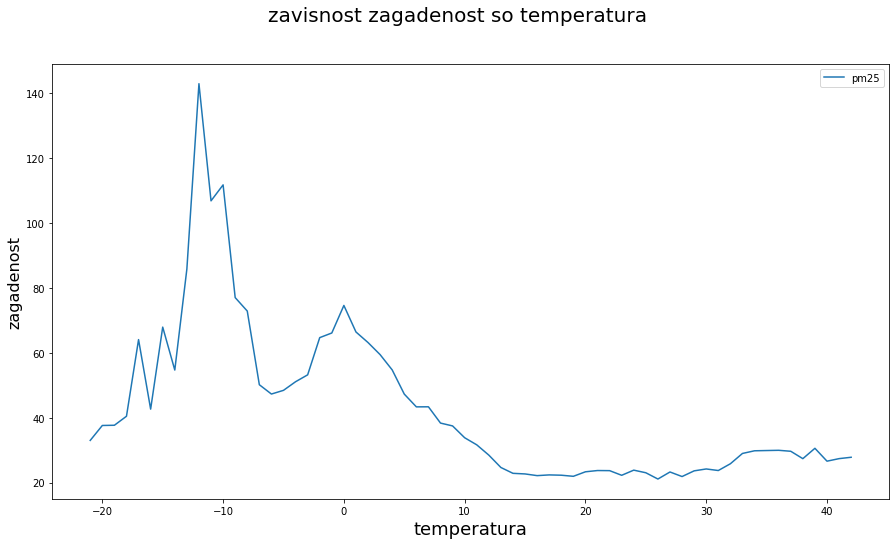

In [96]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select round(temperature) as temp, avg(data) as pm25 \
from table_copy where type='PM25'group by round(temperature)"
df=pd.read_sql(sqlSel, engine)
plt.plot( 'temp', 'pm25', data=df, label='pm25')
plt.legend()
plt.suptitle('zavisnost zagadenost so temperatura', fontsize=20) # where wind <= 1
plt.xlabel('temperatura', fontsize=18)
plt.ylabel('zagadenost', fontsize=16)
plt.show()

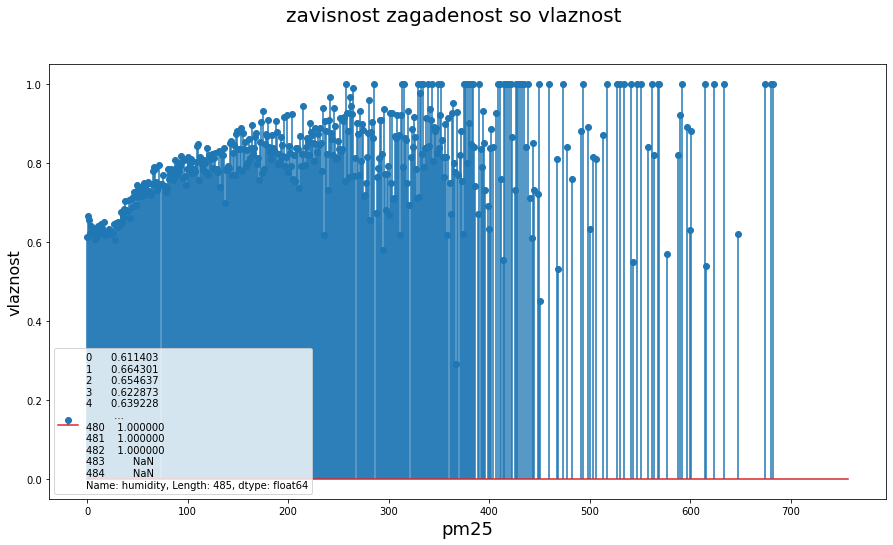

In [9]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select round(data) as pm25, avg(humidity) as humidity \
from table_copy tc where type = 'PM25' and data < 800 \
group by round(data)"
df=pd.read_sql(sqlSel, engine)
plt.stem( 'pm25', 'humidity', data=df, label='humidity')
plt.legend()
plt.suptitle('zavisnost zagadenost so vlaznost', fontsize=20)
plt.xlabel('pm25', fontsize=18)
plt.ylabel('vlaznost', fontsize=16)
plt.show()

<Figure size 1080x576 with 0 Axes>

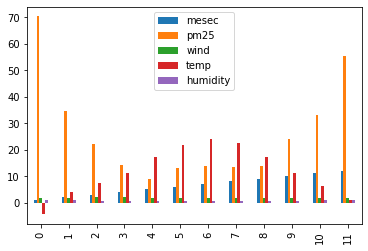

In [13]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

sqlSel="select extract(month from datetime) as mesec, avg(data) as pm25, \
avg(windspeed) as wind, avg(temperature) as temp, avg(humidity) as humidity \
from table_copy \
where type='PM25' \
group by extract(month from datetime)"
df=pd.read_sql(sqlSel, engine)
df.plot(kind = 'bar')


plt.legend()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

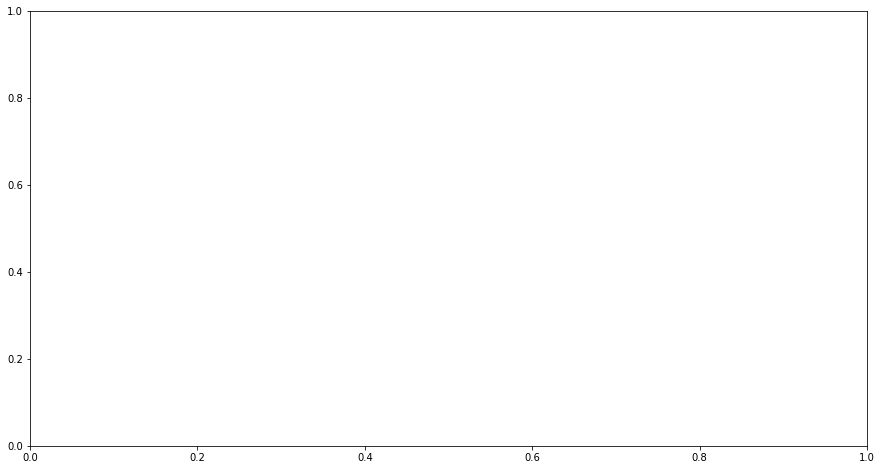

In [17]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select r

plt.show()

najgolemi zavisnosti

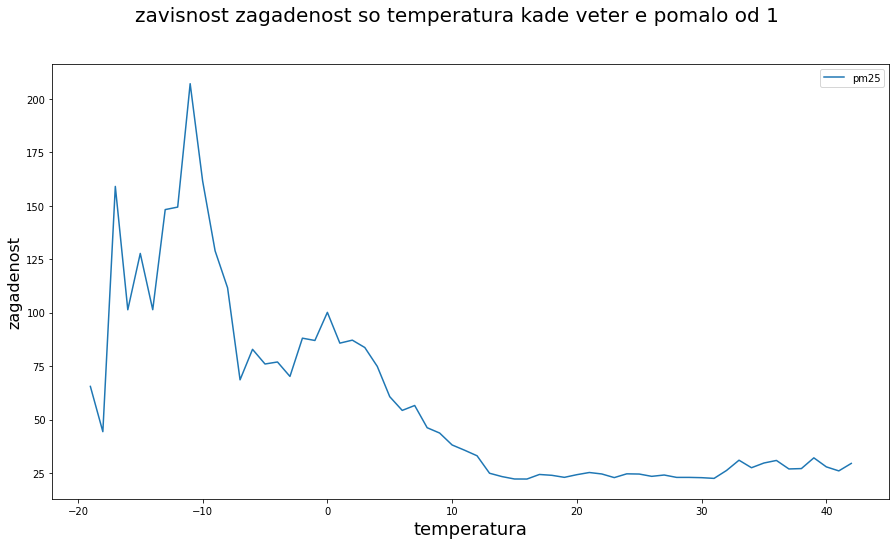

In [4]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select round(temperature) as temp, avg(data) as pm25 \
from table_copy where type='PM25'and (windspeed) <= 1 group by round(temperature)"
df=pd.read_sql(sqlSel, engine)
plt.plot( 'temp', 'pm25', data=df, label='pm25')
plt.legend()
plt.suptitle('zavisnost zagadenost so temperatura kade veter e pomalo od 1', fontsize=20) # where wind <= 1
plt.xlabel('temperatura', fontsize=18)
plt.ylabel('zagadenost', fontsize=16)
plt.show()

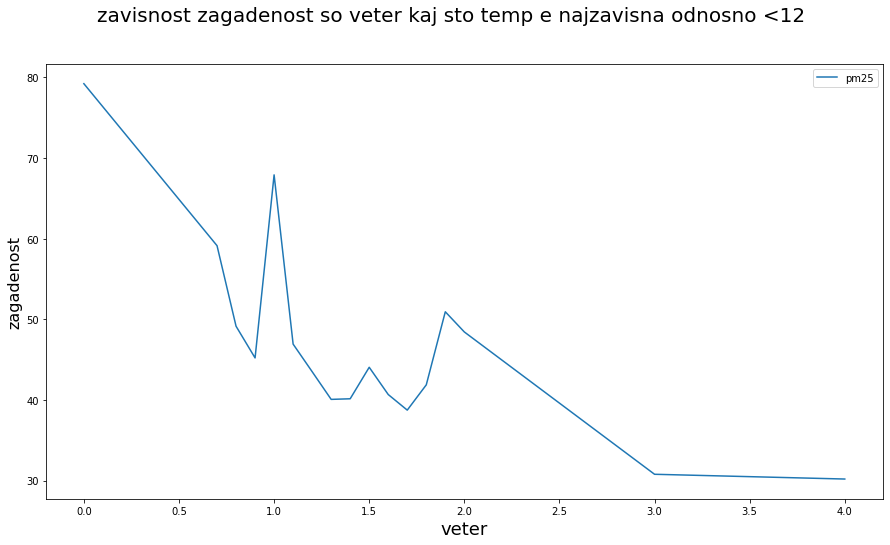

In [12]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
sqlSel="select round(windspeed::numeric, 1) as windspeed, avg(data) as pm25 from table_copy where type='PM25' and temperature < 12\
group by  round(windspeed::numeric, 1) having count(data) > 500"
df=pd.read_sql(sqlSel, engine)
plt.plot( 'windspeed', 'pm25', data=df, label='pm25')
plt.legend()
plt.suptitle('zavisnost zagadenost so veter kaj sto temp e najzavisna odnosno <12', fontsize=20) # temp <12
plt.xlabel('veter', fontsize=18) 
plt.ylabel('zagadenost', fontsize=16)
plt.show()